[dacon 집값 예측 경진대회](https://dacon.io/competitions/official/235869/codeshare/4253?page=1&dtype=recent)  
2022.01.24 ~ 2022.02.04 17:59

<a href="https://colab.research.google.com/github/ktasha45/ai_python/blob/master/colab/dacon/dacon_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
!ls -al /gdrive/MyDrive/tmp/housing.zip

-rw------- 1 root root 51273 Jan 24 03:20 /gdrive/MyDrive/tmp/housing.zip


In [ ]:
!cp /gdrive/MyDrive/tmp/housing.zip ./

In [ ]:
!unzip housing.zip

Archive:  housing.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df = pd.get_dummies(df, columns=['Bsmt Qual', 'Exter Qual', 'Kitchen Qual'])
df.drop(columns = ['id'], inplace=True)

In [3]:
normalize_target = ['Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Garage Cars', 'target']

targetmin = df['target'].min()
targetmax = df['target'].max()

for column_name in normalize_target:
  df['normalized_{}'.format(column_name)] = (df[column_name] - df[column_name].min()) / (df[column_name].max() - df[column_name].min())


df.drop(columns=normalize_target, inplace=True)

In [4]:
max_column_values = {
    'normalized_Garage Yr Blt':0.4,
    'normalized_Gr Liv Area':0.8, 
    'normalized_Garage Area':0.8,
    }

for column_name, max_value in max_column_values.items():
  print(column_name, max_value)
  new_column_name = 'max_limied_{}'.format(column_name)
  df[new_column_name] = df[column_name]
  df.loc[df[new_column_name]>max_value, new_column_name] = max_value

df.drop(columns=max_column_values, inplace=True)

normalized_Garage Yr Blt 0.4
normalized_Gr Liv Area 0.8
normalized_Garage Area 0.8


In [5]:
# for i in range(len(df.columns)):
#    if "_code_" in df.columns[i]: continue
#    print(df.columns[i])
#    plt.hist(df.iloc[:,i], bins=100)
#    plt.show()

In [6]:
df_final = df.astype('float64')
del df

In [7]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Bsmt Qual_Ex                         1350 non-null   float64
 1   Bsmt Qual_Fa                         1350 non-null   float64
 2   Bsmt Qual_Gd                         1350 non-null   float64
 3   Bsmt Qual_Po                         1350 non-null   float64
 4   Bsmt Qual_TA                         1350 non-null   float64
 5   Exter Qual_Ex                        1350 non-null   float64
 6   Exter Qual_Fa                        1350 non-null   float64
 7   Exter Qual_Gd                        1350 non-null   float64
 8   Exter Qual_TA                        1350 non-null   float64
 9   Kitchen Qual_Ex                      1350 non-null   float64
 10  Kitchen Qual_Fa                      1350 non-null   float64
 11  Kitchen Qual_Gd               

In [8]:
col1=df_final.columns[:21].to_list()
col2=df_final.columns[21:].to_list()
new_col=col2+col1
df_edit=df_final[new_col]

del df_final

df_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   max_limied_normalized_Garage Yr Blt  1350 non-null   float64
 1   max_limied_normalized_Gr Liv Area    1350 non-null   float64
 2   max_limied_normalized_Garage Area    1350 non-null   float64
 3   Bsmt Qual_Ex                         1350 non-null   float64
 4   Bsmt Qual_Fa                         1350 non-null   float64
 5   Bsmt Qual_Gd                         1350 non-null   float64
 6   Bsmt Qual_Po                         1350 non-null   float64
 7   Bsmt Qual_TA                         1350 non-null   float64
 8   Exter Qual_Ex                        1350 non-null   float64
 9   Exter Qual_Fa                        1350 non-null   float64
 10  Exter Qual_Gd                        1350 non-null   float64
 11  Exter Qual_TA                 

In [9]:
data = df_edit.to_numpy()

np.random.shuffle(data)

x = data[:,:23]
y = data[:,23:]

split_index = int(len(x)*0.8)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [10]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1080, 23)
(1080, 1)
(270, 23)
(270, 1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 192       
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
61/61 [==============================] - 1s 5

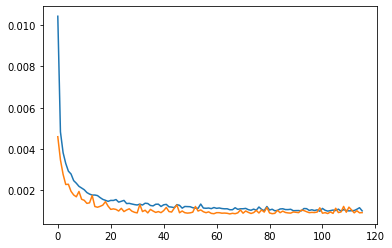

9/9 [==============================] - 0s 2ms/step - loss: 0.0014 - mape: 11.4241
loss= 0.0014088640455156565
mape= 11.424092292785645


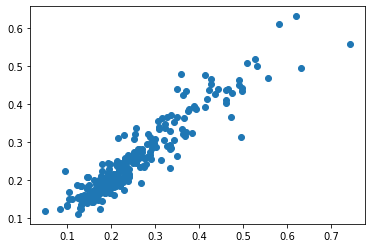

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

model = keras.Sequential()
model.add(Dense(8, activation='relu', input_shape=(23,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))  # 이게 거의 최적.

model.compile(optimizer="adam", loss="mse", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=1000, batch_size=16, validation_split=0.1, callbacks=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

In [12]:
df = pd.read_csv('test.csv')
df = pd.get_dummies(df, columns=['Bsmt Qual', 'Exter Qual', 'Kitchen Qual'])
df.drop(columns = ['id'], inplace=True)
normalize_target = ['Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Garage Cars']
for column_name in normalize_target:
  df['normalized_{}'.format(column_name)] = (df[column_name] - df[column_name].min()) / (df[column_name].max() - df[column_name].min())
df.drop(columns=normalize_target, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Bsmt Qual_Ex               1350 non-null   uint8  
 1   Bsmt Qual_Fa               1350 non-null   uint8  
 2   Bsmt Qual_Gd               1350 non-null   uint8  
 3   Bsmt Qual_Po               1350 non-null   uint8  
 4   Bsmt Qual_TA               1350 non-null   uint8  
 5   Exter Qual_Ex              1350 non-null   uint8  
 6   Exter Qual_Fa              1350 non-null   uint8  
 7   Exter Qual_Gd              1350 non-null   uint8  
 8   Exter Qual_TA              1350 non-null   uint8  
 9   Kitchen Qual_Ex            1350 non-null   uint8  
 10  Kitchen Qual_Fa            1350 non-null   uint8  
 11  Kitchen Qual_Gd            1350 non-null   uint8  
 12  Kitchen Qual_Po            1350 non-null   uint8  
 13  Kitchen Qual_TA            1350 non-null   uint8

In [13]:
col = df_edit.columns.tolist()

In [14]:
for i, coln in enumerate(col):
  print('{}, {}'.format(i, coln))

0, max_limied_normalized_Garage Yr Blt
1, max_limied_normalized_Gr Liv Area
2, max_limied_normalized_Garage Area
3, Bsmt Qual_Ex
4, Bsmt Qual_Fa
5, Bsmt Qual_Gd
6, Bsmt Qual_Po
7, Bsmt Qual_TA
8, Exter Qual_Ex
9, Exter Qual_Fa
10, Exter Qual_Gd
11, Exter Qual_TA
12, Kitchen Qual_Ex
13, Kitchen Qual_Fa
14, Kitchen Qual_Gd
15, Kitchen Qual_TA
16, normalized_Year Built
17, normalized_Year Remod/Add
18, normalized_Overall Qual
19, normalized_Total Bsmt SF
20, normalized_1st Flr SF
21, normalized_Full Bath
22, normalized_Garage Cars
23, normalized_target


In [15]:
col[0] = 'normalized_Garage Yr Blt'
col[1] = 'normalized_Gr Liv Area'
col[2] = 'normalized_Garage Area'
for i, coln in enumerate(col):
  print('{}, {}'.format(i, coln))

0, normalized_Garage Yr Blt
1, normalized_Gr Liv Area
2, normalized_Garage Area
3, Bsmt Qual_Ex
4, Bsmt Qual_Fa
5, Bsmt Qual_Gd
6, Bsmt Qual_Po
7, Bsmt Qual_TA
8, Exter Qual_Ex
9, Exter Qual_Fa
10, Exter Qual_Gd
11, Exter Qual_TA
12, Kitchen Qual_Ex
13, Kitchen Qual_Fa
14, Kitchen Qual_Gd
15, Kitchen Qual_TA
16, normalized_Year Built
17, normalized_Year Remod/Add
18, normalized_Overall Qual
19, normalized_Total Bsmt SF
20, normalized_1st Flr SF
21, normalized_Full Bath
22, normalized_Garage Cars
23, normalized_target


In [16]:
del col[23]
col

['normalized_Garage Yr Blt',
 'normalized_Gr Liv Area',
 'normalized_Garage Area',
 'Bsmt Qual_Ex',
 'Bsmt Qual_Fa',
 'Bsmt Qual_Gd',
 'Bsmt Qual_Po',
 'Bsmt Qual_TA',
 'Exter Qual_Ex',
 'Exter Qual_Fa',
 'Exter Qual_Gd',
 'Exter Qual_TA',
 'Kitchen Qual_Ex',
 'Kitchen Qual_Fa',
 'Kitchen Qual_Gd',
 'Kitchen Qual_TA',
 'normalized_Year Built',
 'normalized_Year Remod/Add',
 'normalized_Overall Qual',
 'normalized_Total Bsmt SF',
 'normalized_1st Flr SF',
 'normalized_Full Bath',
 'normalized_Garage Cars']

In [17]:
df = df[col]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   normalized_Garage Yr Blt   1350 non-null   float64
 1   normalized_Gr Liv Area     1350 non-null   float64
 2   normalized_Garage Area     1350 non-null   float64
 3   Bsmt Qual_Ex               1350 non-null   uint8  
 4   Bsmt Qual_Fa               1350 non-null   uint8  
 5   Bsmt Qual_Gd               1350 non-null   uint8  
 6   Bsmt Qual_Po               1350 non-null   uint8  
 7   Bsmt Qual_TA               1350 non-null   uint8  
 8   Exter Qual_Ex              1350 non-null   uint8  
 9   Exter Qual_Fa              1350 non-null   uint8  
 10  Exter Qual_Gd              1350 non-null   uint8  
 11  Exter Qual_TA              1350 non-null   uint8  
 12  Kitchen Qual_Ex            1350 non-null   uint8  
 13  Kitchen Qual_Fa            1350 non-null   uint8

In [18]:
testnp = df.to_numpy()
testnp_y = model.predict(testnp)

testnp_y = testnp_y * (targetmax - targetmin) + targetmin
testnp_y = testnp_y.reshape((1350, ))
testnp_y

array([184406.10301983, 110953.21847346, 132690.22627512, ...,
       106626.58670086, 135432.95988417, 119523.51634005])

In [19]:
id = np.array(range(len(testnp_y))) + 1

sub_numpy = np.column_stack([id.T, testnp_y.T])

sub_numpy

array([[1.00000000e+00, 2.68800223e+05],
       [2.00000000e+00, 1.14565499e+05],
       [3.00000000e+00, 1.49236020e+05],
       ...,
       [1.34800000e+03, 8.03289870e+04],
       [1.34900000e+03, 1.32207227e+05],
       [1.35000000e+03, 1.22307613e+05]])

In [ ]:
sub_df = pd.DataFrame(sub_numpy, columns=['id', 'target'])
sub_df.head()

In [20]:
sub_df = sub_df.astype({'id':'int'})

NameError: ignored

In [ ]:
sub_df.head()

In [ ]:
sub_df.to_csv('submission.csv', index=False)